In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from benchmark._plot_util import *

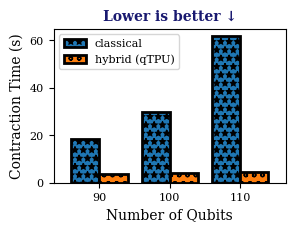

In [22]:

def plot(df: pd.DataFrame, ax):
    df.sort_index(inplace=True)

    df_mean = df.groupby("name").mean()
    df_mean.plot.bar(
        rot=0,
        width=0.8,
        edgecolor="black",
        linewidth=2,
        yerr=df.groupby("name").std().reset_index().drop("name", axis=1).to_numpy().T,
        ax=ax,
        legend=False,
    )
    
    ax.set_xlabel("")
    ax.set_title("Lower is better ↓", fontweight="bold", color="midnightblue")
    hatches = ["**", "oo"]

    color_to_hatch = {}

    i = 0
    for patch in ax.patches:
        if patch.get_facecolor() not in color_to_hatch:
            color_to_hatch[patch.get_facecolor()] = hatches[i % len(hatches)]
            i += 1

    for patch in ax.patches:
        patch.set_hatch(color_to_hatch[patch.get_facecolor()])
        
    ax.legend()
    

df = pd.read_csv("results/cutensor.csv")

df = df[["name", "cutensor_runtime", "qtpu_runtime", "qtpu_contract_time"]]
df["qtpu_runtime"] += df["qtpu_contract_time"]
df = df.drop("qtpu_contract_time", axis=1)

# rename columns
df.columns = ["name", "classical", "hybrid (qTPU)"]

brick_df = df[df["name"].str.contains("brick_100")]
cluster_df = df[df["name"].str.contains("cluster_6")]

# remove "cluster_6_18"
cluster_df = cluster_df[cluster_df["name"] != "cluster_6_18_2"]



fig, ax = plt.subplots(1, 1, figsize=(3, 2.0))
ax.set_ylabel("Contraction Time (s)")

plot(cluster_df, ax)


new_lables = []
for xtick in ax.get_xticklabels():
    # round to the next 10
    xla = int(xtick.get_text().split("_")[1]) * int(xtick.get_text().split("_")[2])
    xla = int(np.ceil(xla / 10) * 10)
    new_lables.append(f"{xla}")


ax.set_xticklabels(new_lables)

ax.set_xlabel("Number of Qubits")

# plot(cluster_df, ax2)
# fig.tight_layout()
# ax.set_yscale("log")
fig;

In [23]:
fig.savefig("cutensor.pdf", bbox_inches="tight")